# TF-IDF using tfidfVectorizer

Main tasks
- reshape data to have article content by month 
- use the TfidfVectorizer from scikit-learn to compute the TF-IDF scores for each subset of the data
- plot results for 10 top key words for each news media set 

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
from pathlib import Path  
import glob

In [2]:
#import data
df = pd.read_csv('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Data/preprocessed.csv', encoding='latin-1')
df.head()  

,date,maintext,title,source,media_name,ideology,Congress,text_lemma,title_lemma,maintext_no_fullstop
0,03/01/2013,greg gutfeld cohost america. greg gutfeld andr...,reagan era al jazeera buys current tv,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th,greg gutfeld cohost america . greg gutfeld and...,reagan era al jazeera buys current tv,greg gutfeld cohost america greg gutfeld andre...
1,11/01/2013,latest threat leadership easily speaker house ...,job safe straus challenge gop,C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th,late threat leadership easily speaker house jo...,job safe straus challenge gop,latest threat leadership easily speaker house ...
2,18/01/2013,story highlights mills remembers march selma m...,years mlk march voting rights vulnerable,https://edition.cnn.com/2013/01/18/opinion/mil...,CNN,left,113th,story highlight mill remember march selma mont...,years mlk march voting rights vulnerable,story highlights mills remembers march selma m...
3,20/01/2013,barack michelle obama spent thousand days disp...,change years friends shifts obamas,C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th,barack michelle obama spend thousand day displ...,change years friends shifts obamas,barack michelle obama spent thousand days disp...
4,21/01/2013,sean hannity host hannity moments ago presiden...,interview karl rove,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th,sean hannity host hannity moment ago president...,interview karl rove,sean hannity host hannity moments ago presiden...


In [10]:
# create two dataframes for left and right news media
left = df[df['ideology'].isin(['left'])]
right = df[df['ideology'].isin(['right'])]

In [21]:
# Convert the 'date' column to a datetime 
# group the original DataFrame by month and concatenate the text of articles within each month

# Left news media
left['date'] = pd.to_datetime(left['date'])
merged_left = pd.DataFrame(columns=['date', 'maintext'])

grouped = df.groupby(left['date'].dt.to_period("M"))
for group_name, group_data in grouped:
    month = group_name.strftime('%Y-%m')  # Format to display only year and month
    text = ' '.join(str(x) for x in group_data['maintext'])
    merged_left = merged_left.append({'date': month, 'maintext': text}, ignore_index=True)

# Right news media
right['date'] = pd.to_datetime(right['date'])
merged_right = pd.DataFrame(columns=['date', 'maintext'])
grouped = df.groupby(right['date'].dt.to_period("M"))
for group_name, group_data in grouped:
    month = group_name.strftime('%Y-%m')  # Format to display only year and month
    text = ' '.join(str(x) for x in group_data['maintext'])
    merged_right = merged_right.append({'date': month, 'maintext': text}, ignore_index=True)


C:\Users\2146806A\AppData\Local\Temp\ipykernel_24540\873496060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left['date'] = pd.to_datetime(left['date'])
C:\Users\2146806A\AppData\Local\Temp\ipykernel_24540\873496060.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_left = merged_left.append({'date': month, 'maintext': text}, ignore_index=True)
C:\Users\2146806A\AppData\Local\Temp\ipykernel_24540\873496060.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_left = merged_left.append({'date': month, 'maintext': text}, ignore_index=True)
C:\Users\2146

In [ ]:

# QUARTER! - same thing but for quarter instead of monthly

# Left media
left['date'] = pd.to_datetime(left['date'])
merged_left_q = pd.DataFrame(columns=['date', 'maintext'])
grouped = df.groupby(left['date'].dt.to_period("Q"))
for group_name, group_data in grouped:
    start_month = group_name.start_time.strftime('%Y-%m')  # Format to display year and month
    text = ' '.join(str(x) for x in group_data['maintext'])
    merged_left_q = merged_left_q.append({'date': start_month, 'maintext': text}, ignore_index=True)

# Right media
right['date'] = pd.to_datetime(right['date'])
merged_right_q = pd.DataFrame(columns=['date', 'maintext'])
grouped = df.groupby(right['date'].dt.to_period("Q"))
for group_name, group_data in grouped:
    start_month = group_name.start_time.strftime('%Y-%m')  # Format to display year and month
    text = ' '.join(str(x) for x in group_data['maintext'])
    merged_right_q = merged_right_q.append({'date': start_month, 'maintext': text}, ignore_index=True)

In [ ]:
# we load the data
#df = pd.read_csv('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Data/left_date.csv', encoding='latin-1')
#df_right= pd.read_csv('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Data/right_date.csv', encoding='latin-1')
#df.head()


## Left news media

In [24]:
corpus_l = merged_left['maintext'].apply(str) # all documents
documents_l = [" ".join(strings.split()) for strings in corpus_l] 

date_str_l = merged_left['date'].apply(str) # all documents
date_l = [" ".join(strings.split()) for strings in date_str_l]

In [16]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(documents_l)

In [25]:
# create a pandas dataframe tfidf_df from the output of the TfidfVectorizer
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=date_l, columns=tfidf_vectorizer.get_feature_names_out())

In [26]:
# select words of interest
tfidf_slice_l = tfidf_df[['voting','rights', 'voter', 'law', 'vote', 'north_carolina', 'gop', 'republicans', 'voters', 'fraud']] 
tfidf_slice_l.sort_index().round(decimals=2)
tfidf_slice_l['date'] = tfidf_slice_l.index
tfidf_slice_l.head()

C:\Users\2146806A\AppData\Local\Temp\ipykernel_24540\4095325946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_slice_l['date'] = tfidf_slice_l.index


,voting,rights,voter,law,vote,north_carolina,gop,republicans,voters,fraud,date
2013-01,0.182547,0.121698,0.201563,0.216775,0.076061,0.141881,0.037180,0.015212,0.152123,0.053685,2013-01
2013-02,0.269027,0.152449,0.134513,0.131524,0.125546,0.021098,0.032470,0.074730,0.110600,0.027126,2013-02
2013-03,0.126333,0.177468,0.090238,0.081214,0.066175,0.009099,0.003267,0.078206,0.051135,0.012132,2013-03
2013-04,0.192330,0.155943,0.239113,0.103962,0.166339,0.141513,0.045172,0.088368,0.119556,0.062895,2013-04
2013-05,0.096709,0.046252,0.113528,0.058866,0.105118,0.093272,0.045674,0.046252,0.058866,0.012719,2013-05


In [27]:
tfidf_slice_l['date']= pd.to_datetime(tfidf_slice_l['date'])
tfidf_slice_l = tfidf_slice_l.sort_values(by="date")
tfidf_slice_l['date'] = tfidf_slice_l['date'].dt.strftime('%Y-%m')
tfidf_slice_l['voting'] = pd.to_numeric(tfidf_slice_l['voting'], errors='coerce')
tfidf_slice_l['rights'] = pd.to_numeric(tfidf_slice_l['rights'], errors='coerce')
tfidf_slice_l['voter'] = pd.to_numeric(tfidf_slice_l['voter'], errors='coerce')
tfidf_slice_l['law'] = pd.to_numeric(tfidf_slice_l['law'], errors='coerce')
tfidf_slice_l['vote'] = pd.to_numeric(tfidf_slice_l['vote'], errors='coerce')
tfidf_slice_l['north_carolina'] = pd.to_numeric(tfidf_slice_l['north_carolina'], errors='coerce')
tfidf_slice_l['gop'] = pd.to_numeric(tfidf_slice_l['gop'], errors='coerce')
tfidf_slice_l['republicans'] = pd.to_numeric(tfidf_slice_l['republicans'], errors='coerce')
tfidf_slice_l['voters'] = pd.to_numeric(tfidf_slice_l['voters'], errors='coerce')
tfidf_slice_l['fraud'] = pd.to_numeric(tfidf_slice_l['fraud'], errors='coerce')
tfidf_slice_l.head()

C:\Users\2146806A\AppData\Local\Temp\ipykernel_24540\2738312476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_slice_l['date']= pd.to_datetime(tfidf_slice_l['date'])


,voting,rights,voter,law,vote,north_carolina,gop,republicans,voters,fraud,date
2013-01,0.182547,0.121698,0.201563,0.216775,0.076061,0.141881,0.037180,0.015212,0.152123,0.053685,2013-01
2013-02,0.269027,0.152449,0.134513,0.131524,0.125546,0.021098,0.032470,0.074730,0.110600,0.027126,2013-02
2013-03,0.126333,0.177468,0.090238,0.081214,0.066175,0.009099,0.003267,0.078206,0.051135,0.012132,2013-03
2013-04,0.192330,0.155943,0.239113,0.103962,0.166339,0.141513,0.045172,0.088368,0.119556,0.062895,2013-04
2013-05,0.096709,0.046252,0.113528,0.058866,0.105118,0.093272,0.045674,0.046252,0.058866,0.012719,2013-05


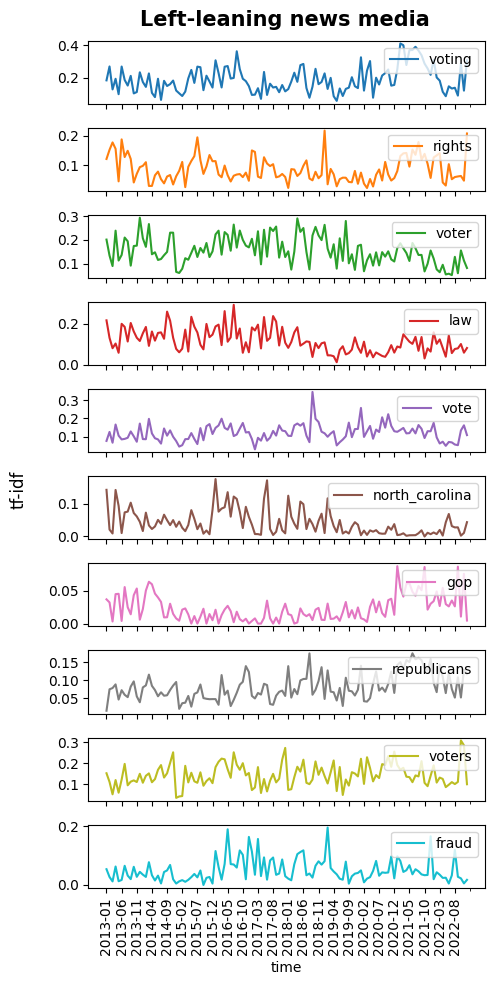

In [20]:
fig, axs = plt.subplots(10, 1, figsize=(5, 10), sharex=True)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, col in enumerate(tfidf_slice_l.columns[:10]): # use only the first 10 columns
    tfidf_slice_l[col].plot(ax=axs[i], color=colors[i])
    axs[i].legend(loc='upper right')
    axs[i].set_ylabel('')
    axs[i].set_xlabel('time')
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

fig.supylabel('tf-idf')
fig.suptitle('Left-leaning news media', fontsize=15, fontweight='bold', x=0.57)

# Increase the number of x-axis labels (modify the range and step as needed)
plt.xticks(range(0, len(tfidf_slice_l), 5), tfidf_slice_l.index[::5], rotation=90)

plt.tight_layout()
plt.show()

#fig.savefig('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Plots/tfidf_left', dpi=300, bbox_inches='tight')



## Right news media

In [28]:
corpus_right = merged_right['maintext'].apply(str) # all documents
documents_right = [" ".join(strings.split()) for strings in corpus_right] 

date_str_right = merged_right['date'].apply(str) # all documents
date_right = [" ".join(strings.split()) for strings in date_str_right]

In [29]:
tfidf_vectorizer_right = TfidfVectorizer()
tfidf_vector_right = tfidf_vectorizer_right.fit_transform(documents_right)

In [30]:
tfidf_df_right = pd.DataFrame(tfidf_vector_right.toarray(), index=date_right, columns=tfidf_vectorizer_right.get_feature_names_out())
# select words of interest
tfidf_slice_right = tfidf_df_right[['biden','president','senator', 'border', 'rep','covid','media','left','crisis','integrity']] 
tfidf_slice_right.sort_index().round(decimals=2)
tfidf_slice_right['date'] = tfidf_slice_right.index
tfidf_slice_right.head()

C:\Users\2146806A\AppData\Local\Temp\ipykernel_24540\3146754247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_slice_right['date'] = tfidf_slice_right.index


,biden,president,senator,border,rep,covid,media,left,crisis,integrity,date
2013-01,0.002601,0.111199,0.003393,0.004856,0.000000,0.0,0.007528,0.013690,0.000000,0.000000,2013-01
2013-03,0.000000,0.062788,0.009014,0.004300,0.000000,0.0,0.009999,0.012122,0.013026,0.000000,2013-03
2013-04,0.000000,0.058846,0.003098,0.000000,0.003590,0.0,0.017181,0.012497,0.008953,0.000000,2013-04
2013-05,0.000000,0.073010,0.009150,0.000000,0.000000,0.0,0.010151,0.014767,0.002645,0.000000,2013-05
2013-06,0.000000,0.067456,0.016709,0.000000,0.007263,0.0,0.004634,0.010533,0.009055,0.002508,2013-06


In [ ]:
tfidf_slice_right['date']= pd.to_datetime(tfidf_slice_right['date'])
tfidf_slice_right = tfidf_slice_right.sort_values(by="date")
tfidf_slice_right['date'] = tfidf_slice_right['date'].dt.strftime('%Y-%m')
tfidf_slice_right['biden'] = pd.to_numeric(tfidf_slice_right['biden'], errors='coerce')
tfidf_slice_right['president'] = pd.to_numeric(tfidf_slice_right['president'], errors='coerce')
tfidf_slice_right['senator'] = pd.to_numeric(tfidf_slice_right['senator'], errors='coerce')
tfidf_slice_right['border'] = pd.to_numeric(tfidf_slice_right['border'], errors='coerce')
tfidf_slice_right['rep'] = pd.to_numeric(tfidf_slice_right['rep'], errors='coerce')
tfidf_slice_right['covid'] = pd.to_numeric(tfidf_slice_right['covid'], errors='coerce')
tfidf_slice_right['media'] = pd.to_numeric(tfidf_slice_right['media'], errors='coerce')
tfidf_slice_right['left'] = pd.to_numeric(tfidf_slice_right['left'], errors='coerce')
tfidf_slice_right['crisis'] = pd.to_numeric(tfidf_slice_right['crisis'], errors='coerce')
tfidf_slice_right['integrity'] = pd.to_numeric(tfidf_slice_right['integrity'], errors='coerce')
tfidf_slice_right.head()

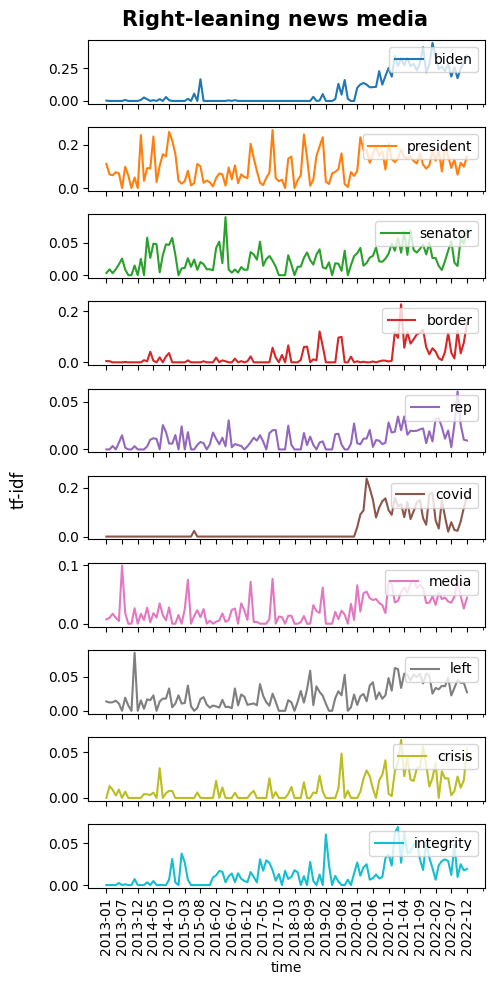

In [32]:
fig, axs = plt.subplots(10, 1, figsize=(5, 10), sharex=True)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, col in enumerate(tfidf_slice_right.columns[:10]): # use only the first 10 columns
    tfidf_slice_right[col].plot(ax=axs[i], color=colors[i])
    axs[i].legend(loc='upper right')
    axs[i].set_ylabel('')
    axs[i].set_xlabel('time')
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

fig.supylabel('tf-idf')
fig.suptitle('Right-leaning news media', fontsize=15, fontweight='bold', x=0.55)

# Increase the number of x-axis labels (modify the range and step as needed)
plt.xticks(range(0, len(tfidf_slice_right), 5), tfidf_slice_right.index[::5], rotation=90)

plt.tight_layout()
plt.show()

#fig.savefig('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Plots/tfidf_right', dpi=300, bbox_inches='tight')
